# Multiple Variable Regression

The task is to train a multiple linear regression model using all features to predict quality using the same splits as used in previous question. Evaluate the model on the test set using MSE, RMSE, and R2.

First, we need to load the data into the seam splits as in the previous notebook.


In [66]:
import pandas as pd
from sklearn.model_selection import KFold

# Load the dataset
df = pd.read_pickle("../data/winequality.pkl")

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Multiple Linear Regression with Cross-Validation

In this section, we train a multiple linear regression model using all available features to predict wine quality. We use 5-fold cross-validation to evaluate the model's performance, ensuring that our results are robust and not dependent on a particular train-test split. For each fold, we compute the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score. Finally, we aggregate these metrics across all folds to summarize the model's overall performance.

In [67]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Initialize the model
lin_reg = LinearRegression()

# Prepare features and target variable
X = df.drop(columns=["quality"])
y = df["quality"]

# Store results
mse_list, rmse_list, r2_list = [], [], []

# Perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

    print(f"Fold {fold+1}: R2 = {r2:.4f}, MSE = {mse:.4f}, RMSE = {rmse:.4f}")

# Aggregate results and save to CSV
results = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "R2"],
    "Mean": [np.mean(mse_list), np.mean(rmse_list), np.mean(r2_list)],
    "Variance": [np.var(mse_list), np.var(rmse_list), np.var(r2_list)]
})
results.to_csv("../reports/tables/cross_validation_results.csv", index=False)

print("\nCross-validation results (aggregated):")
results

Fold 1: R2 = 0.3128, MSE = 0.3824, RMSE = 0.6184
Fold 2: R2 = 0.3434, MSE = 0.4836, RMSE = 0.6954
Fold 3: R2 = 0.3625, MSE = 0.4320, RMSE = 0.6573
Fold 4: R2 = 0.4000, MSE = 0.4095, RMSE = 0.6400
Fold 5: R2 = 0.3580, MSE = 0.3776, RMSE = 0.6145

Cross-validation results (aggregated):


,Metric,Mean,Variance
0,MSE,0.417039,0.001491
1,RMSE,0.645112,0.000870
2,R2,0.355326,0.000802


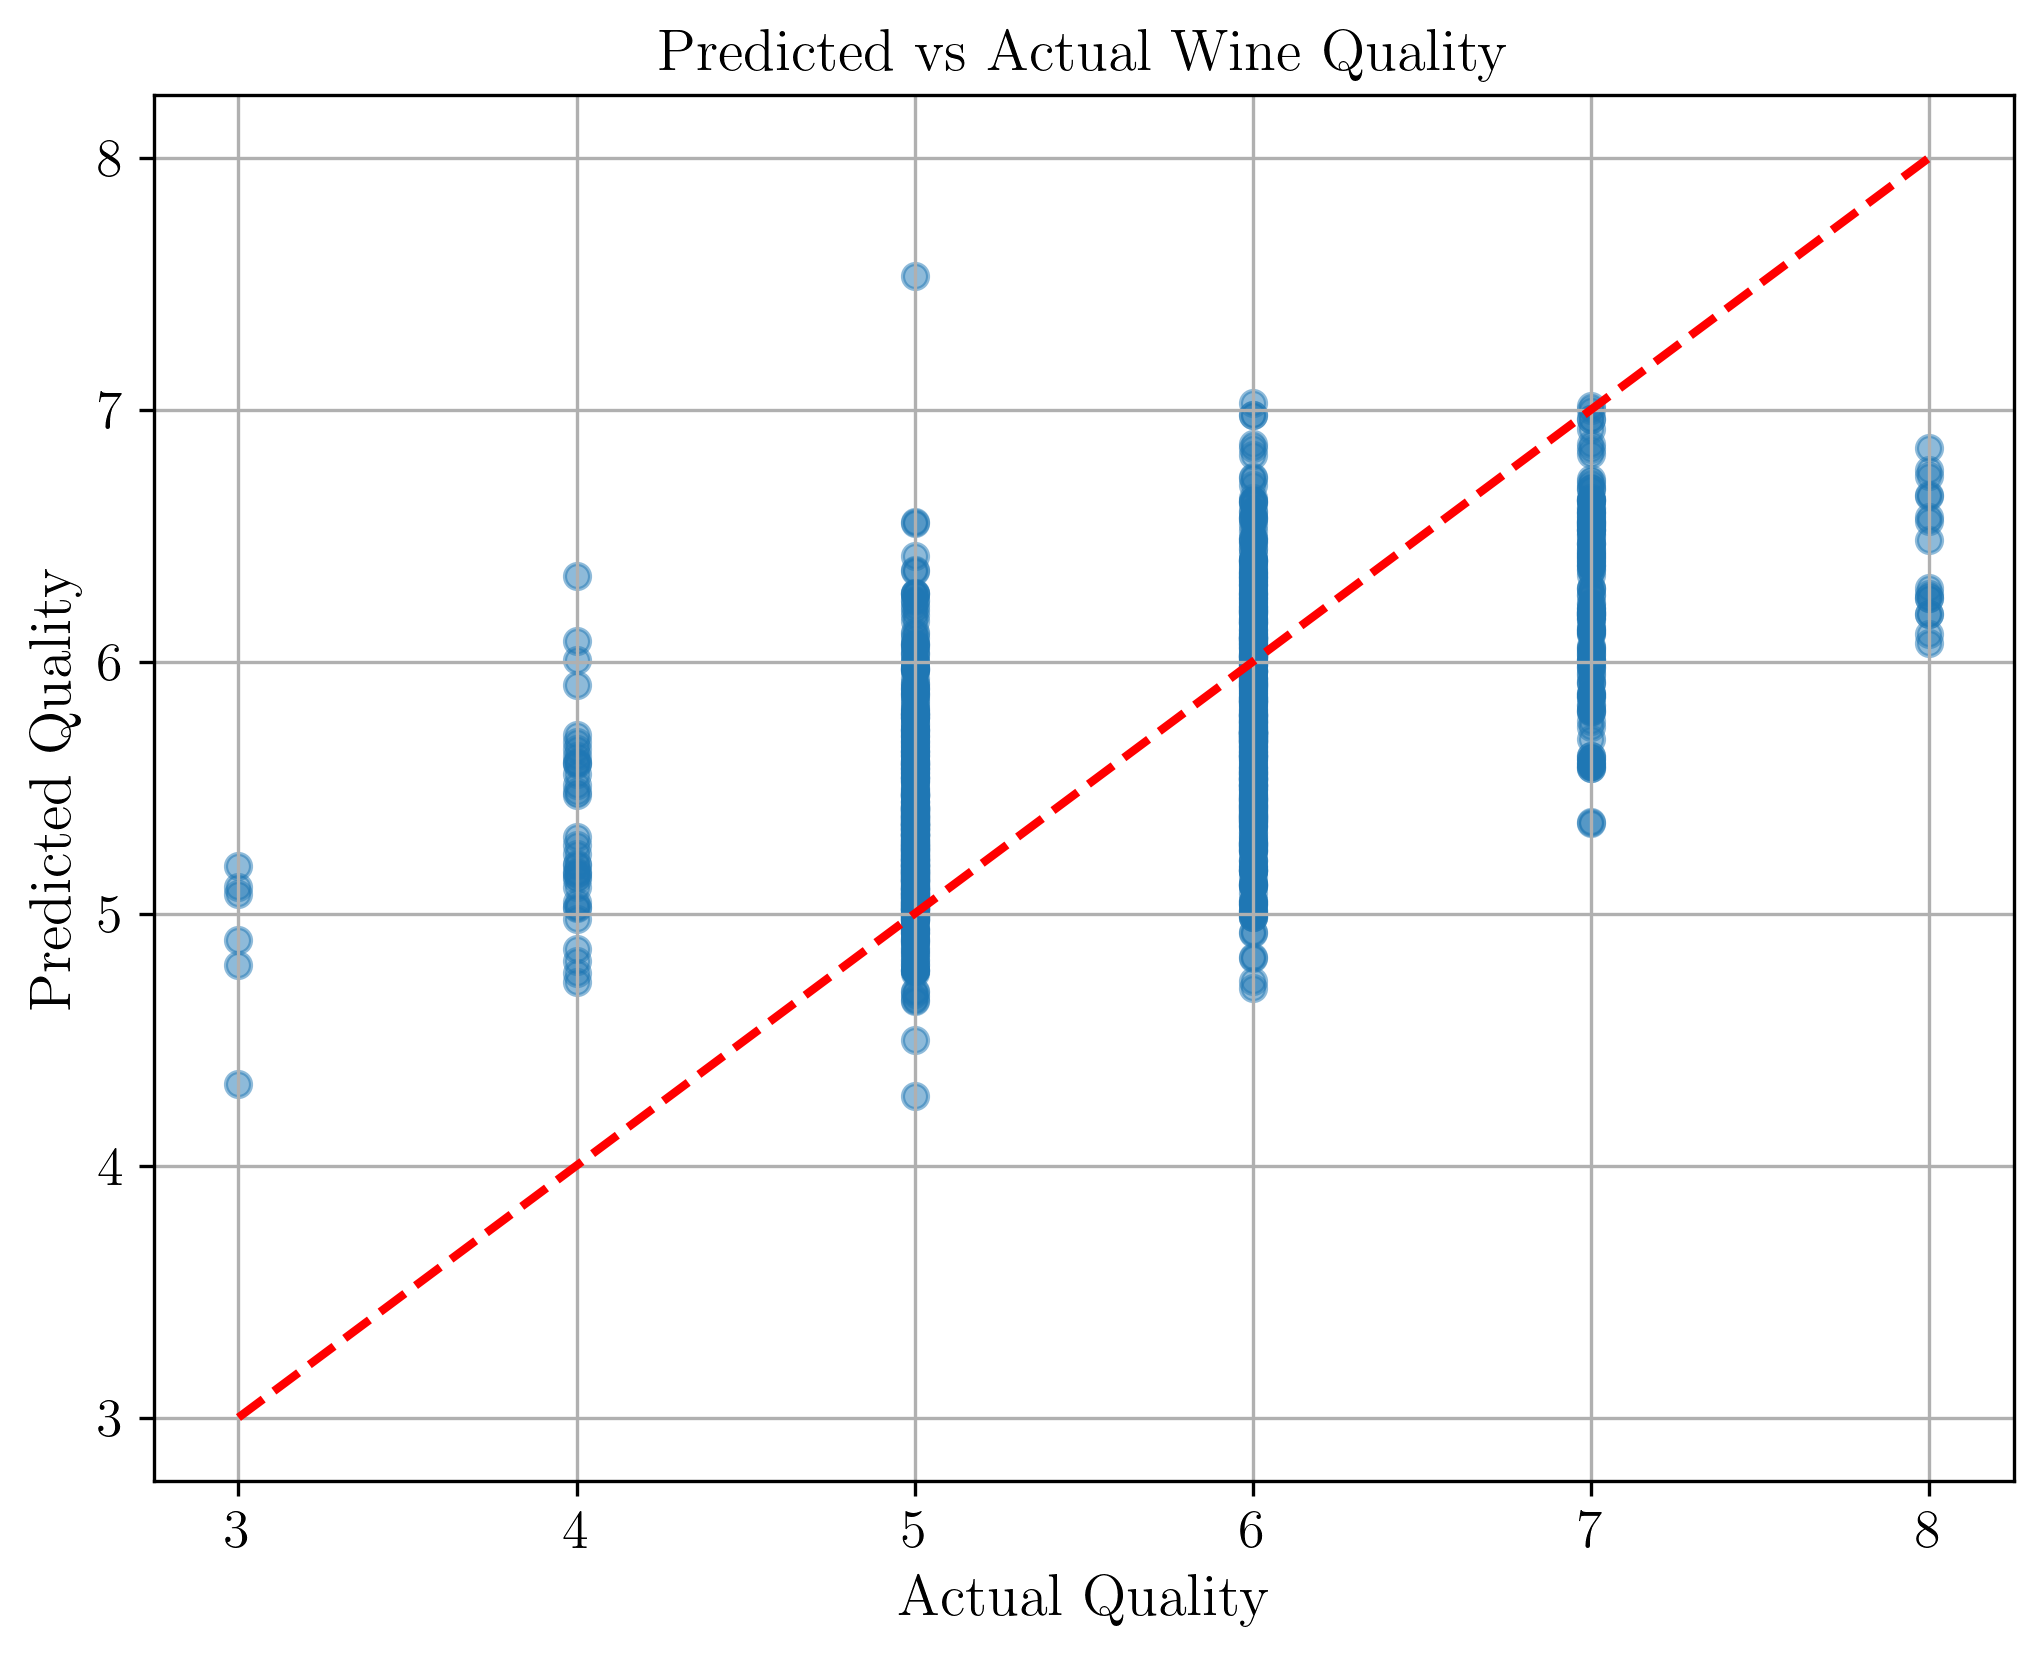

In [68]:
# Plot predictions vs actual values
import matplotlib.pyplot as plt

X = df.drop(columns=["quality"])
y = df["quality"]
y_pred = lin_reg.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Predicted vs Actual Wine Quality")
plt.grid()
plt.savefig("../reports/figures/predicted_vs_actual.png")

### Comparison of Multiple vs. Single Linear Regression

